<a href="https://colab.research.google.com/github/edgaracabral/Kaggle_BankMarketing/blob/main/01_Kaggle_BankMarketing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Bank Marketing Case
## Análise Exploratória de Dados (EDA)

Este Notebook fará a Análise Exploratória dos dados disponíveis no Caso Bank Marketing disponível no Kaggle ([link](https://www.kaggle.com/datasets/abdelazizsami/bank-marketing/data)).

# 1. Descrição Geral do Conjunto de Dados

**Descrição:** O conjunto de dados contém informações sobre campanhas de
marketing de uma instituição bancária portuguesa, referentes a chamadas telefônicas com intuito de vender um produto de investimento.

Nosso objetivo é prever se um cliente assinará um depósito a prazo. Há mais de 40 mil exemplos de variáveis com target.

**Colunas:**
* **age**: Idade do cliente
* **job**: Tipo de trabalho
* **marital**: Estado civil
* **education**: Nível de educação
* **default**: Tem crédito em inadimplência?
* **balance**: Saldo médio anual
* **housing**: Tem empréstimo para habitação?
* **loan**: Tem empréstimo pessoal?
* **contact**: Tipo de comunicação de contato
* **day**: Último dia de contato do mês
* **month**: Último mês de contato do ano
* **duration**: Duração do último contato, em segundos
* **campaign**: Número de contatos realizados durante esta campanha e
para este cliente
* **pdays**: Número de dias desde o último contato com o cliente em uma
campanha anterior
* **previous**: Número de contatos realizados antes desta campanha e
para este cliente
* **poutcome**: Resultado da campanha de marketing anterior
* **y**: O cliente assinou um depósito a prazo? (variável alvo)

## Classificação dos Dados de acordo com o Entendimento do Negócio

Para facilitar o entendimento de como usar a base de dados, agrupamos as colunas de acordo com algumas categorias funcionais:

**Dados do cliente:**
* age
* job
* marital
* education

**Dados de Bureau:**
* default
* housing
* loan

**Dados Internos em Nossa Instituição:**
* balance
* default
* housing
* loan

**Dados da Campanha Atual:**
* contact
* day
* month
* duration
* campaign
* y

**Dados da Campanha Anterior:**
* pdays
* previous
* poutcome

Note que os **Dados de Bureau** estão repetidos nos **Dados Internos em Nossa Instituição**. Se nosso objetivo for Originação de novos clientes, provavelmente teremos de adquirir estes dados de um provedor. Porém, se nosso objetivo é oferecer um novo serviço aos clientes existentes, talvez apenas os dados internos sejam suficientes, reduzindo os custos de segmentação da campanha.

Ao analisar os dados, percebeu-se que a variável que melhor correlaciona com o Alvo é a *duration* (Duração do último contato, em segundos). Uma hipótese formada é que a última ligação também seja o processo de fechamento do contrato, o que faria com que os dados referentes a esta ligação não sejam válidos caso o objetivo seja prever a propensão para a fase de Seleção de Clientes para Contato. Faremos dois processos de escoragem, um considerando os dados da Campanha Atual, outro excluindo estes dados.

Os **Dados da Campanha Anterior** podem ser importantes nesta Seleção de Clientes, portanto separamos estes dos **Dados da Campanha Atual**. A variável **pdays** (Número de dias desde o último contato com o cliente em uma campanha anterior) seria no caso uma estimativa dos dias entre o último contato de uma campanha anterior e a provável data de contato pela Campanha.


# 2. Leitura dos Dados

## 2.1 Setando o Ambiente

- Google Drive
- Libraries Utilizadas
- Path

In [62]:
# Conectando com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Armazene o caminho do folder em file_path
file_path = '/content/drive/MyDrive/Kaggle/Bank\ Marketing/01\ original \data'

# Vá para o folder de dados
%cd $file_path

/content/drive/MyDrive/Kaggle/Bank Marketing/01 original data


## 2.2 Carregando os Dados

In [65]:
# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('bank-full.csv', sep=';')

# Exibir o tamanho do arquivo lido
print(f"df.shape = {df.shape}")

# Exibir as primeiras linhas do DataFrame
df.head()

df.shape = (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [66]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [67]:
# Redirecione para o folder on pod_academy_functions.py is localizado
%cd /content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework
import pod_academy_functions as pod

/content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework


# 3. Análise dos Dados

## 3.1 Listar valores de baixa frequência nas variáveis categóricas

In [68]:
# Checar Frequencia nas variáveis categóricas
print(pod.pod_custom_lowfreq(df))

      Coluna     Indice  Frequencia
7      month        dec         214
0        job    unknown         288
3    default        yes         815
8   poutcome    success        1511
2  education    unknown        1857
6    contact  telephone        2906
1    marital   divorced        5207
9          y        yes        5289
5       loan        yes        7244
4    housing         no       20081


Notamos que:
* poucas ligações feitas em Dezembro
* poucos casos em que o emprego é *desconhecido* (**job == unknown**)
* poucos casos em que o cliente está *inadimplente* (**default == yes**)
* poucos casos em que a campanha anterior tinha sido bem sucedida (**poutcome == success**)

## 3.2 Criar metadados de Domínio (tipo dos dados)

Este processo ajuda a verificar **quantidade de nulos**, **cardinalidade** e **tipo** das variáveis. Facilita o uso de rotinas para visualização automática dos dados.

In [69]:
metadados = pod.pod_academy_generate_metadata(df,
                                          ids=[],
                                          targets=['y'],
                                          orderby = 'CARDINALIDADE')

metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,balance,Explicativa,0,0.0,7168,int64
1,duration,Explicativa,0,0.0,1573,int64
2,pdays,Explicativa,0,0.0,559,int64
3,age,Explicativa,0,0.0,77,int64
4,campaign,Explicativa,0,0.0,48,int64
5,previous,Explicativa,0,0.0,41,int64
6,day,Explicativa,0,0.0,31,int64
7,job,Explicativa,0,0.0,12,object
8,month,Explicativa,0,0.0,12,object
9,poutcome,Explicativa,0,0.0,4,object


## 3.3 Lista a frequência dos elementos com baixa cardinalidade

In [70]:
def listar_frequencias(df, threshold=4):
    frequencias = {}

    for coluna in df.columns:
        if df[coluna].nunique() <= threshold:
            value_counts = df[coluna].value_counts()
            total_counts = len(df)

            freq_percentage = (value_counts / total_counts) * 100
            freq_percentage = freq_percentage.round(2)
            frequencias[coluna] = pd.DataFrame({
                'Valor': value_counts.index,
                'Frequencia': value_counts.values,
                '%': freq_percentage.values
            })

    # Exibindo as frequências de cada coluna
    for coluna, freq_df in frequencias.items():
        print(f"Coluna: {coluna}")
        print(freq_df)
        print()

    return

listar_frequencias(df)

Coluna: marital
      Valor  Frequencia      %
0   married       27214  60.19
1    single       12790  28.29
2  divorced        5207  11.52

Coluna: education
       Valor  Frequencia      %
0  secondary       23202  51.32
1   tertiary       13301  29.42
2    primary        6851  15.15
3    unknown        1857   4.11

Coluna: default
  Valor  Frequencia     %
0    no       44396  98.2
1   yes         815   1.8

Coluna: housing
  Valor  Frequencia      %
0   yes       25130  55.58
1    no       20081  44.42

Coluna: loan
  Valor  Frequencia      %
0    no       37967  83.98
1   yes        7244  16.02

Coluna: contact
       Valor  Frequencia      %
0   cellular       29285  64.77
1    unknown       13020  28.80
2  telephone        2906   6.43

Coluna: poutcome
     Valor  Frequencia      %
0  unknown       36959  81.75
1  failure        4901  10.84
2    other        1840   4.07
3  success        1511   3.34

Coluna: y
  Valor  Frequencia     %
0    no       39922  88.3
1   yes        52

## 3.4 Análise Box-Plot e de Estatísticas de Quartis das variáveis numéricas

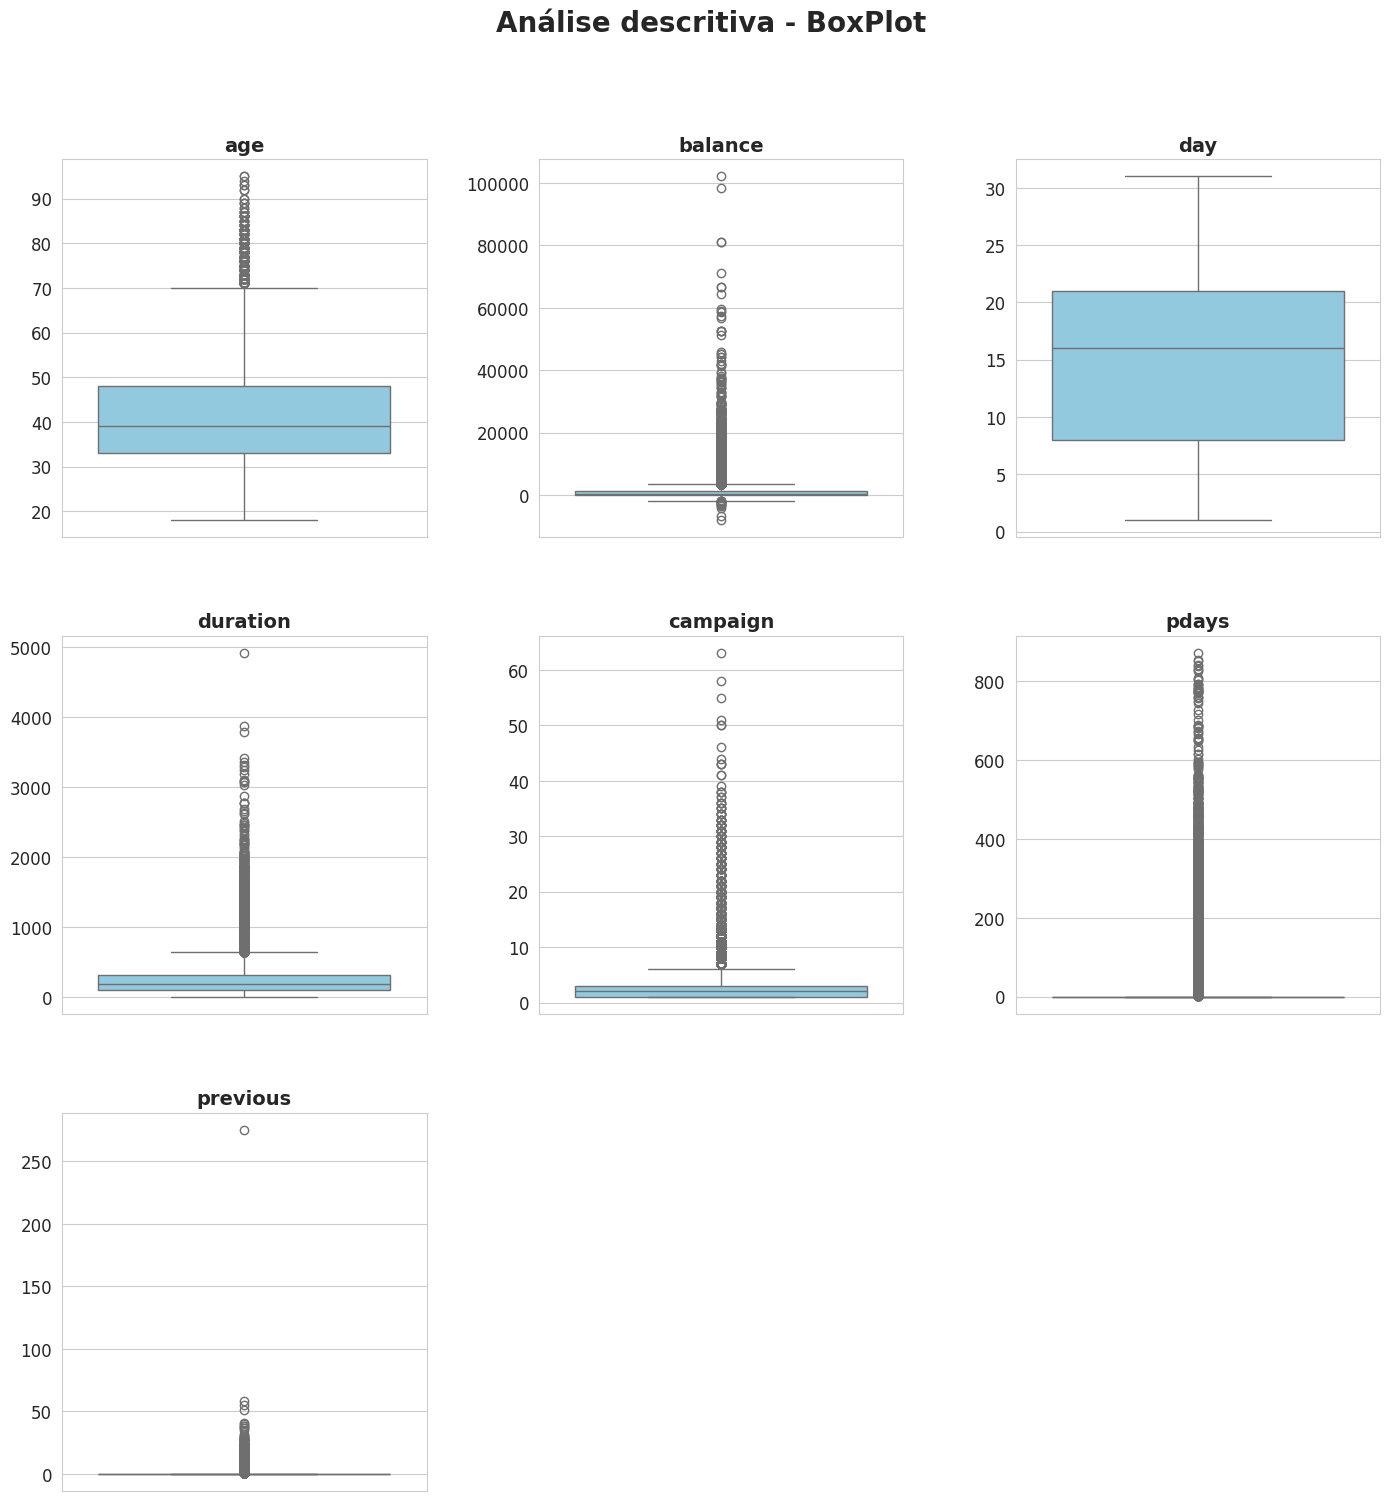

In [71]:
def pod_academy_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
pod_academy_box_plot(df)

In [72]:
def calcular_estatisticas(df):
    """
    Calcula os quartis (Q1, Q2 e Q3), mínimo e máximo para colunas numéricas em um DataFrame.

    Parâmetros:
        df (pandas.DataFrame): O DataFrame de entrada.

    Retorna:
        pandas.DataFrame: Um DataFrame contendo as estatísticas para cada coluna numérica.
    """
    # Filtrar apenas as colunas numéricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64'])

    # Calcular mínimo, quartis e máximo
    estatisticas = colunas_numericas.agg(['min', lambda x: x.quantile(0.05), lambda x: x.quantile(0.25), 'median',
                                        lambda x: x.quantile(0.75), lambda x: x.quantile(0.95), 'max']).T

    # Renomear as colunas para melhor compreensão
    estatisticas.columns = ['Min', '5%', 'Q1', 'Q2 (Mediana)', 'Q3', '95%', 'Max']

    return estatisticas

# Calcula as estatísticas
print(calcular_estatisticas(df))

             Min     5%     Q1  Q2 (Mediana)      Q3     95%       Max
age         18.0   27.0   33.0          39.0    48.0    59.0      95.0
balance  -8019.0 -172.0   72.0         448.0  1428.0  5768.0  102127.0
day          1.0    3.0    8.0          16.0    21.0    29.0      31.0
duration     0.0   35.0  103.0         180.0   319.0   751.0    4918.0
campaign     1.0    1.0    1.0           2.0     3.0     8.0      63.0
pdays       -1.0   -1.0   -1.0          -1.0    -1.0   317.0     871.0
previous     0.0    0.0    0.0           0.0     0.0     3.0     275.0


In [73]:
# Filtrar as linhas onde a coluna y == 'yes'
print(calcular_estatisticas(df[df['y'] == 'yes']))

             Min     5%     Q1  Q2 (Mediana)      Q3     95%      Max
age         18.0   25.0   31.0          38.0    50.0    68.0     95.0
balance  -3058.0    0.0  210.0         733.0  2159.0  6836.4  81204.0
day          1.0    2.0    8.0          15.0    22.0    30.0     31.0
duration     8.0  130.4  244.0         426.0   725.0  1291.8   3881.0
campaign     1.0    1.0    1.0           2.0     3.0     5.0     32.0
pdays       -1.0   -1.0   -1.0          -1.0    98.0   342.0    854.0
previous     0.0    0.0    0.0           0.0     1.0     6.0     58.0


In [74]:
# Filtrar as linhas onde a coluna y == 'no'
print(calcular_estatisticas(df[df['y'] == 'no']))

             Min     5%    Q1  Q2 (Mediana)      Q3      95%       Max
age         18.0   27.0  33.0          39.0    48.0    58.00      95.0
balance  -8019.0 -196.0  58.0         417.0  1345.0  5638.65  102127.0
day          1.0    3.0   8.0          16.0    21.0    29.00      31.0
duration     0.0   30.0  95.0         164.0   279.0   596.00    4918.0
campaign     1.0    1.0   1.0           2.0     3.0     8.00      63.0
pdays       -1.0   -1.0  -1.0          -1.0    -1.0   312.95     871.0
previous     0.0    0.0   0.0           0.0     0.0     3.00     275.0


O gráfico Box-Plot permite avaliar a existência de outliers. Abaixo algumas observações para cada variável analisada:

* **age**: vemos que 50% das idades (Q1, Q3) se encontram entre 33 e 48 anos de idade, com a existência de alguns valores altos acima de 70 anos.
* **balance**: A grande maioria dos dados apresenta baixo balanço em conta, Q3 sendo 1428.
* **duration**: 50% da duração das últimas ligações se encontram entre 1.5 e 5.5 minutos (Q1, Q3), com outliers chegando a 1 hora e 22 minutos.
* **campaign**: 50% das clientes foi abordado de 1 a 3 vezes (de Q1 a Q3).
* **pdays**: Ao que tudo indica, quando o cliente não foi contactado antes, o valor de pdays == -1.
* **previous**: Com certeza 75% dos clientes nunca foi contactado antes (Q3 == 0).


## 3.5 Análise por Histogramas das variáveis numéricas

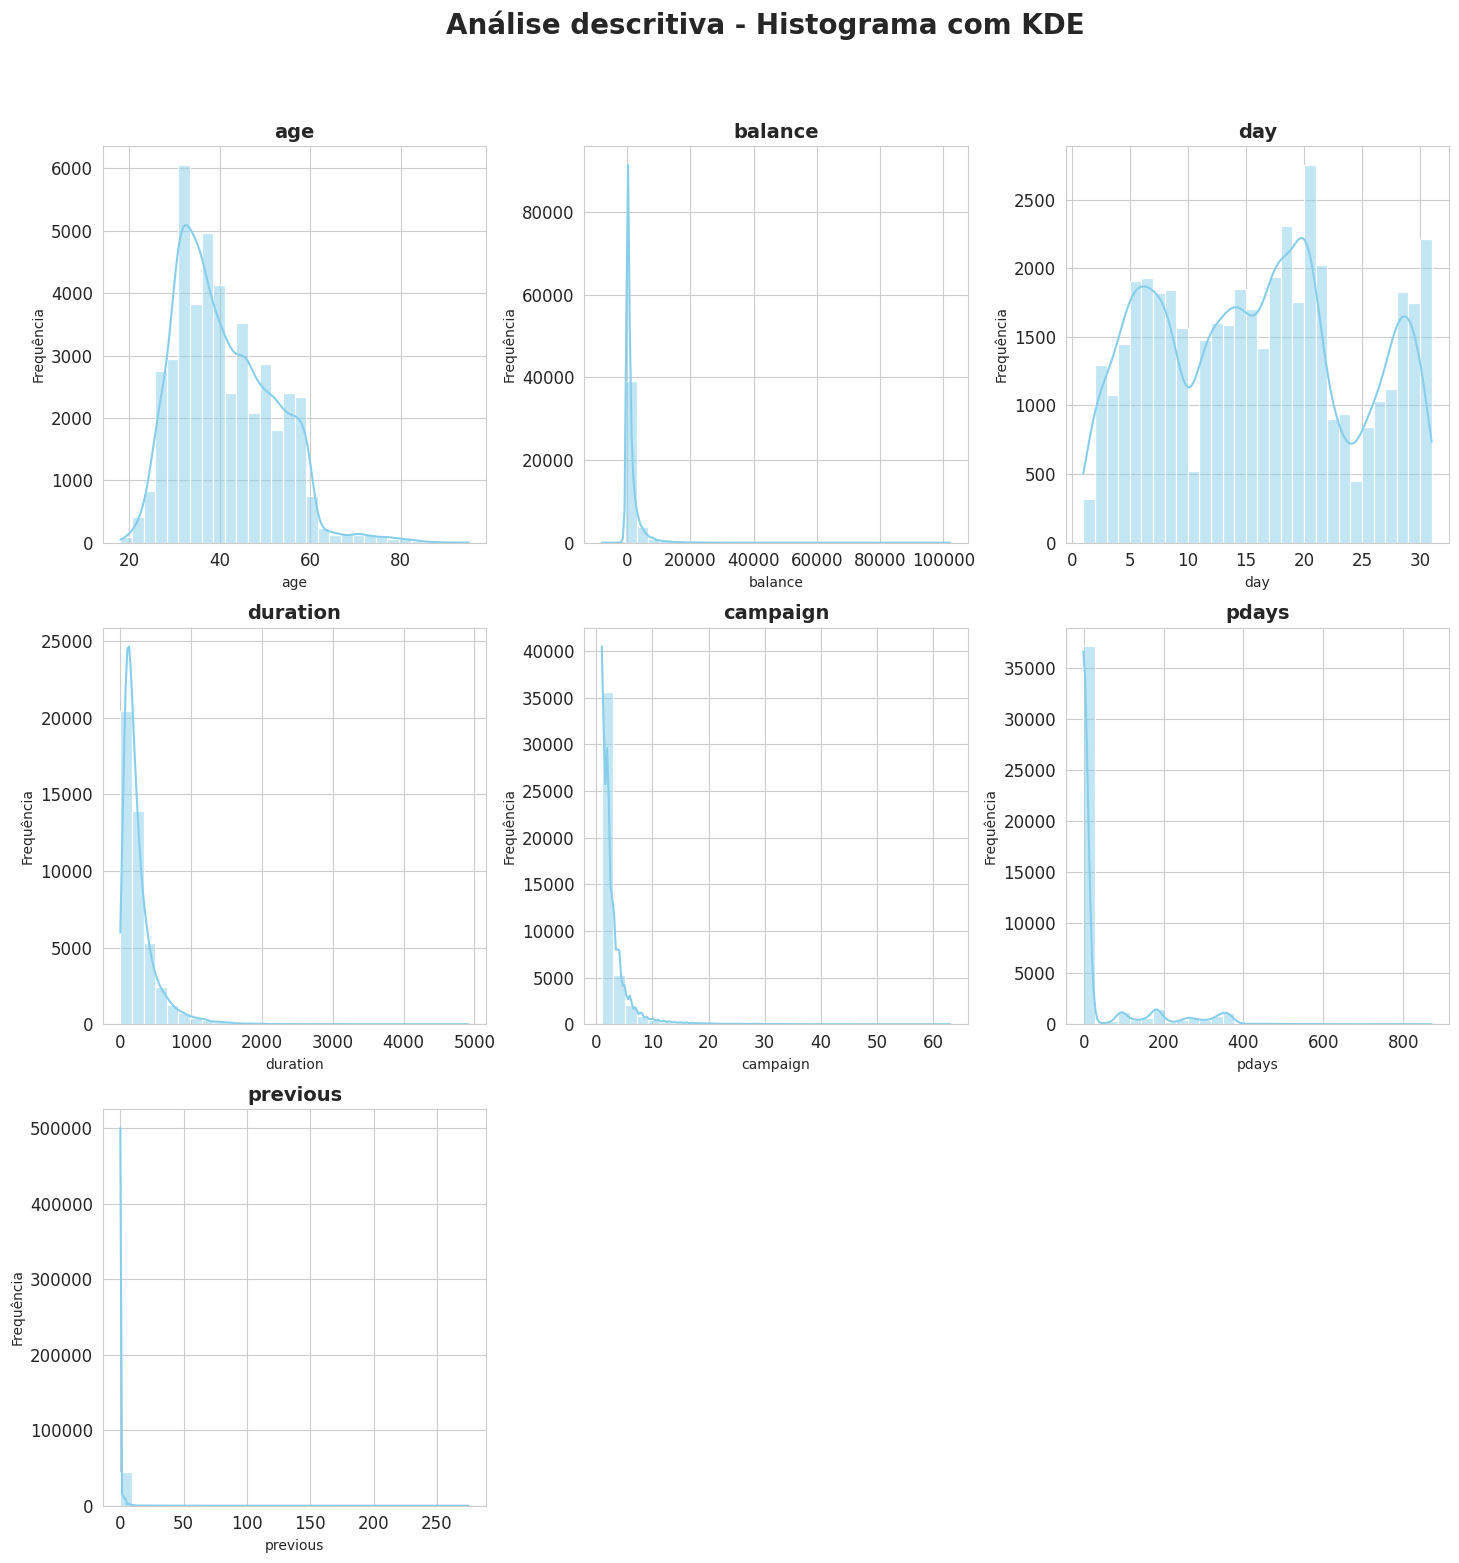

In [75]:
def pod_academy_histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
pod_academy_histograms(df)

Os histogramas acima não indicam nenhuma anormalidade que pudesse ser preocupantes. Talvez a única variável que não faça sentido isoladamente para o estudo de caso seja **day**. Poderíamos pensar em agrupar com **month**, mas a priori deixarei o modelo escolher se faz algum impacto.

## 3.6 Análise por Frequência das Categorias

###3.6.a Categorias ressaltando Target

In [76]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2, target='', type='abs'):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        if target=='':
            df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        else:
            # Contagem de valores agrupados por região e sexo
            counts = df.groupby([var, target]).size().unstack(fill_value=0)

            # Se type == 'abs' fazer barras com valor absoluto
            if type == 'abs':
                # Criando o gráfico de barras empilhado
                ax = counts.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
            else: # Se type == 'perc' fazer barras com porcentagem
                # Calcular as porcentagens para cada região
                percentages = counts.div(counts.sum(axis=1), axis=0) * 100

                # Criando o gráfico de barras empilhado
                ax = percentages.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

        # Mostrar as porcentagens no topo das barras
        if type != 'abs':
            # Mostrar as porcentagens no topo das barras
            for container in ax.containers:
                ax.bar_label(container, fmt='%.1f%%', label_type='center')

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

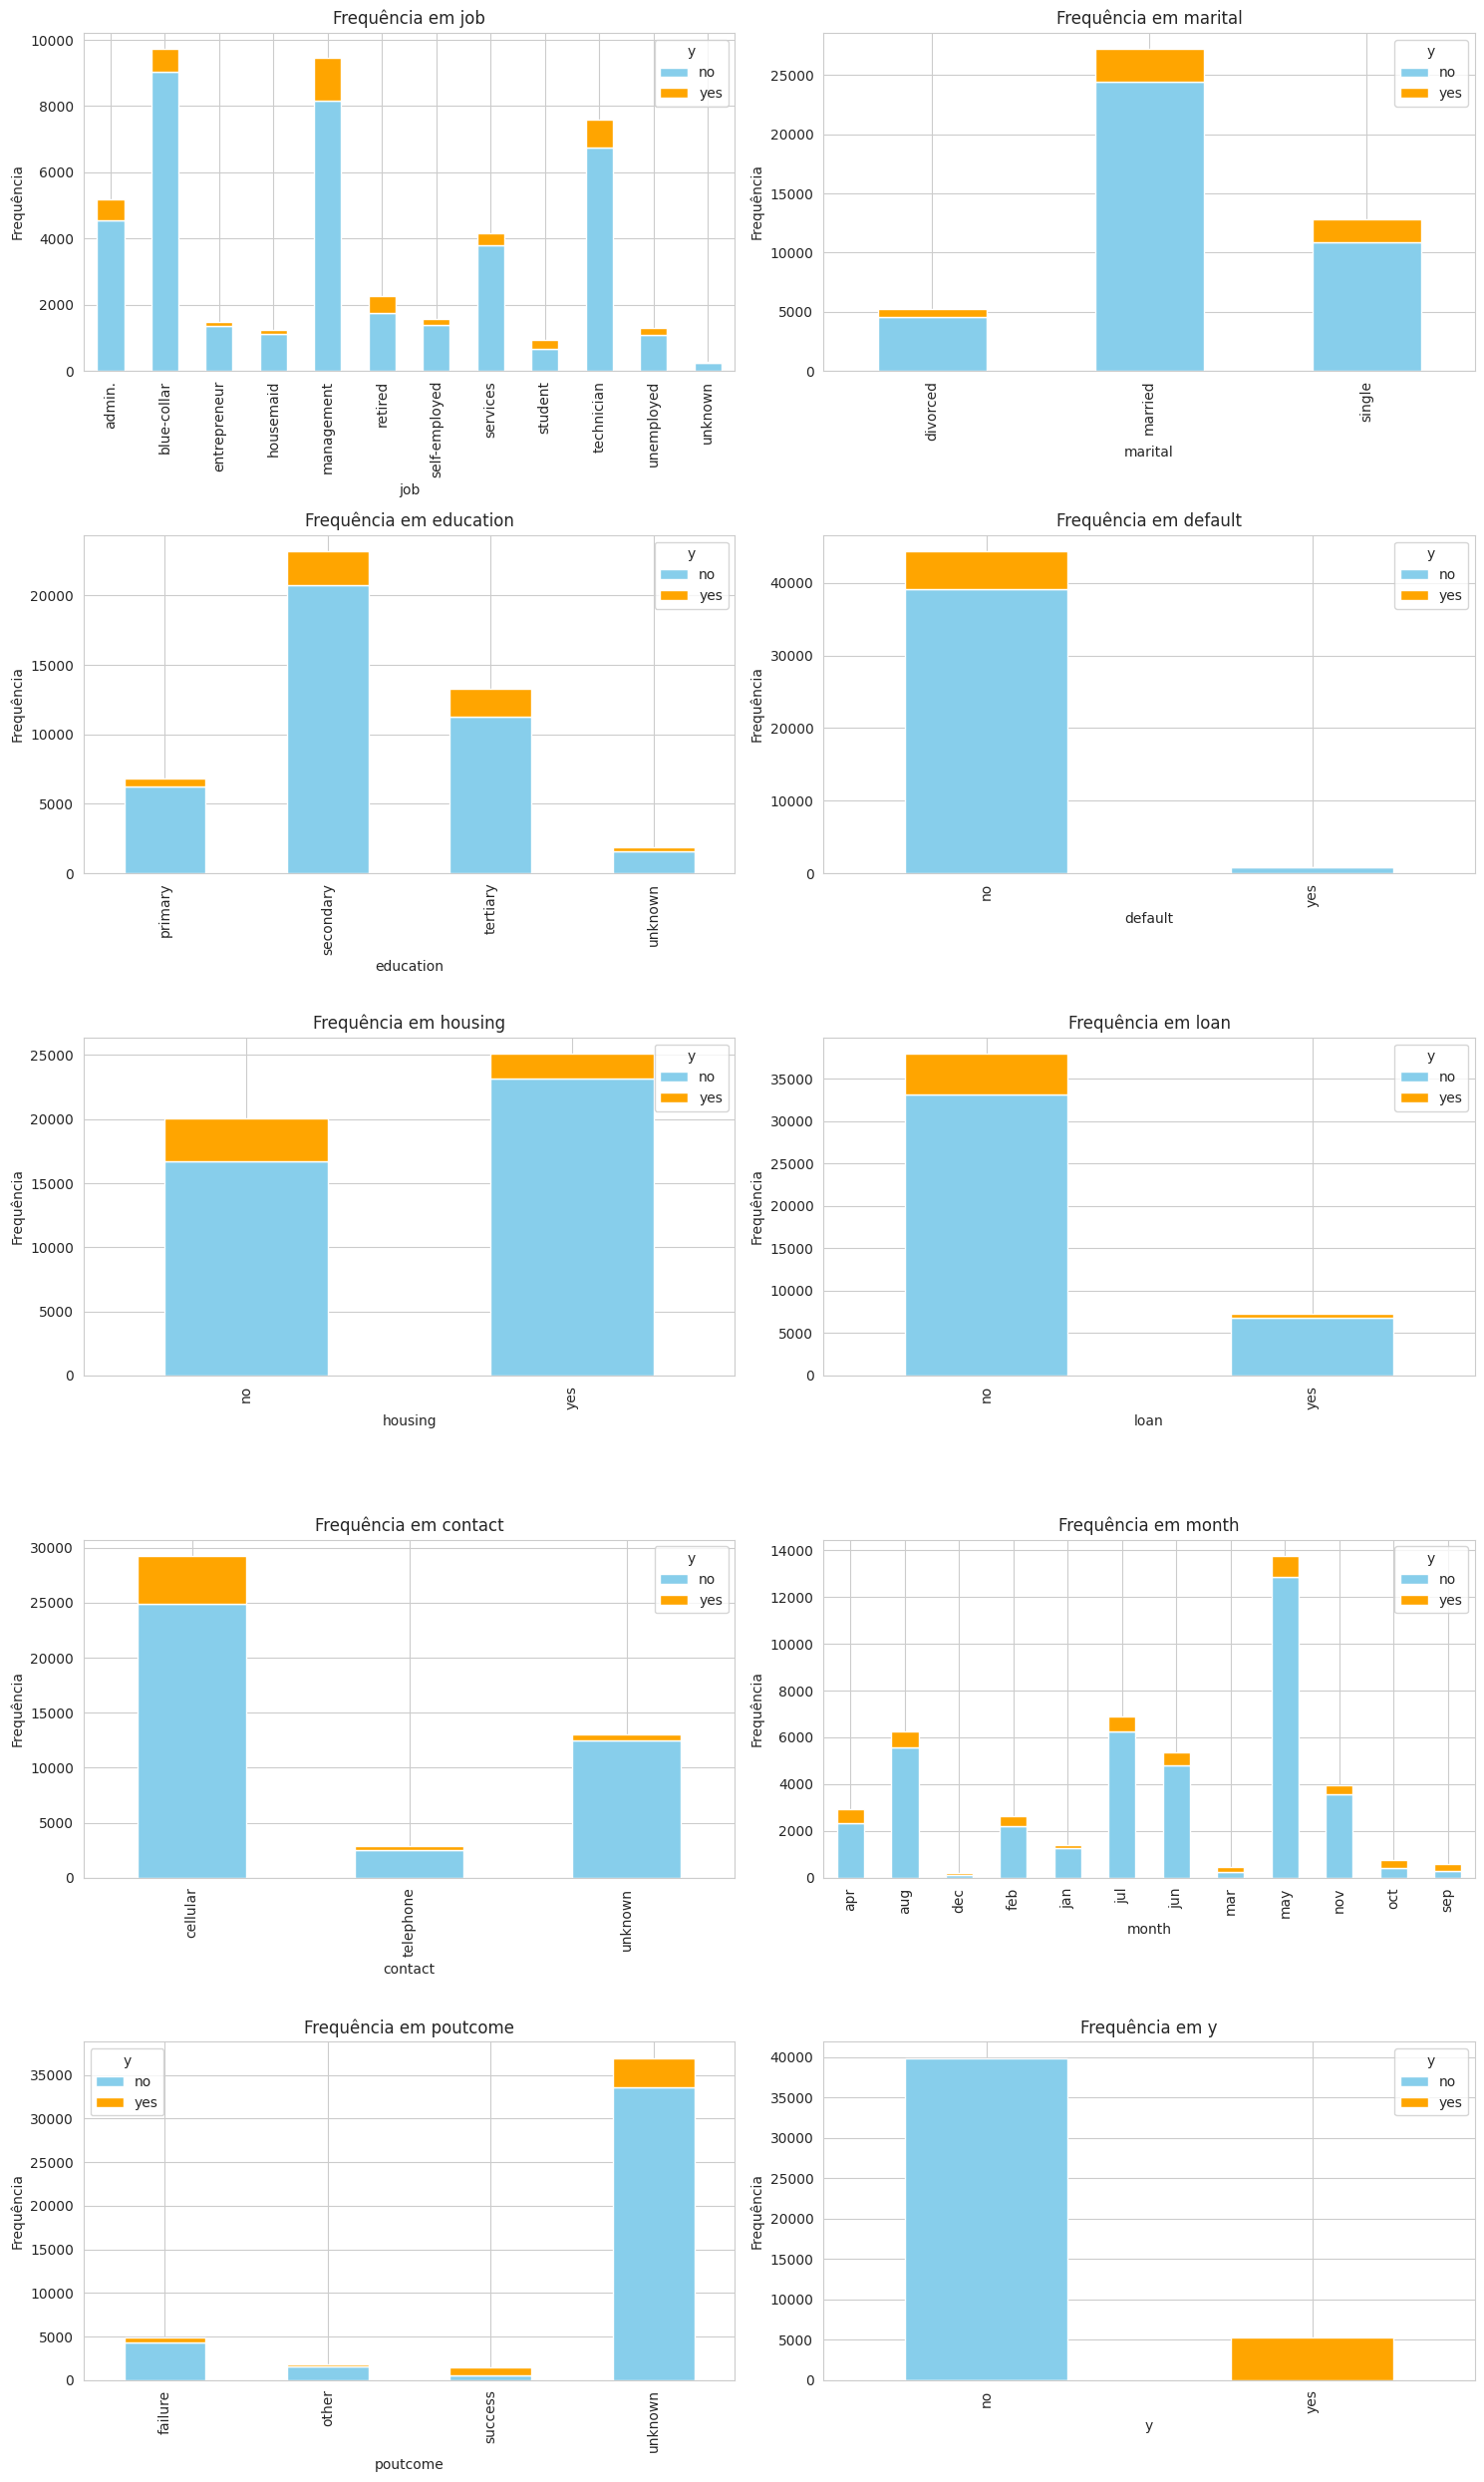

In [77]:
# Plota os gráficos com valores absolutos
plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2, target='y', type='abs')

Nas variáveis categóricas foram observados os seguintes pontos:

* **job**: temos várias categorias, sendo as mais frequentes *admin.*, *blue-collar*, *management*, *services* e *technician*. A categoria *unknown* parece não ter nenhum **y == yes**.

* **marital**: apenas 3 categorias, com *married* sendo mais da metada da base (60.19%), seguido por *single* (28.29%) e por último *divorced* (11.52%).

* **education**: forte concentração em *secondary* (51.32%), seguido de *tertiary* (29.42%).

* **default**: temos poucos clientes inadimplentes contactados na campanha (1.8%).

* **housing**: um pouco mais da metade tem empréstimo para habitação (55.58%).

* **loan**: a maioria não tem empréstimo pessoal (83.98%).

* **contact**: a maioria usa celular para contato (64.77%).

* **month**: uma grande concentração de chamadas feitas em maio (*may*), outros meses significativos são junho, julho, agosto e novembro.

* **poutcome**: apenas 1511 casos de *success* (3.34%).


### 3.6.b Categorias em Percentual Relativo

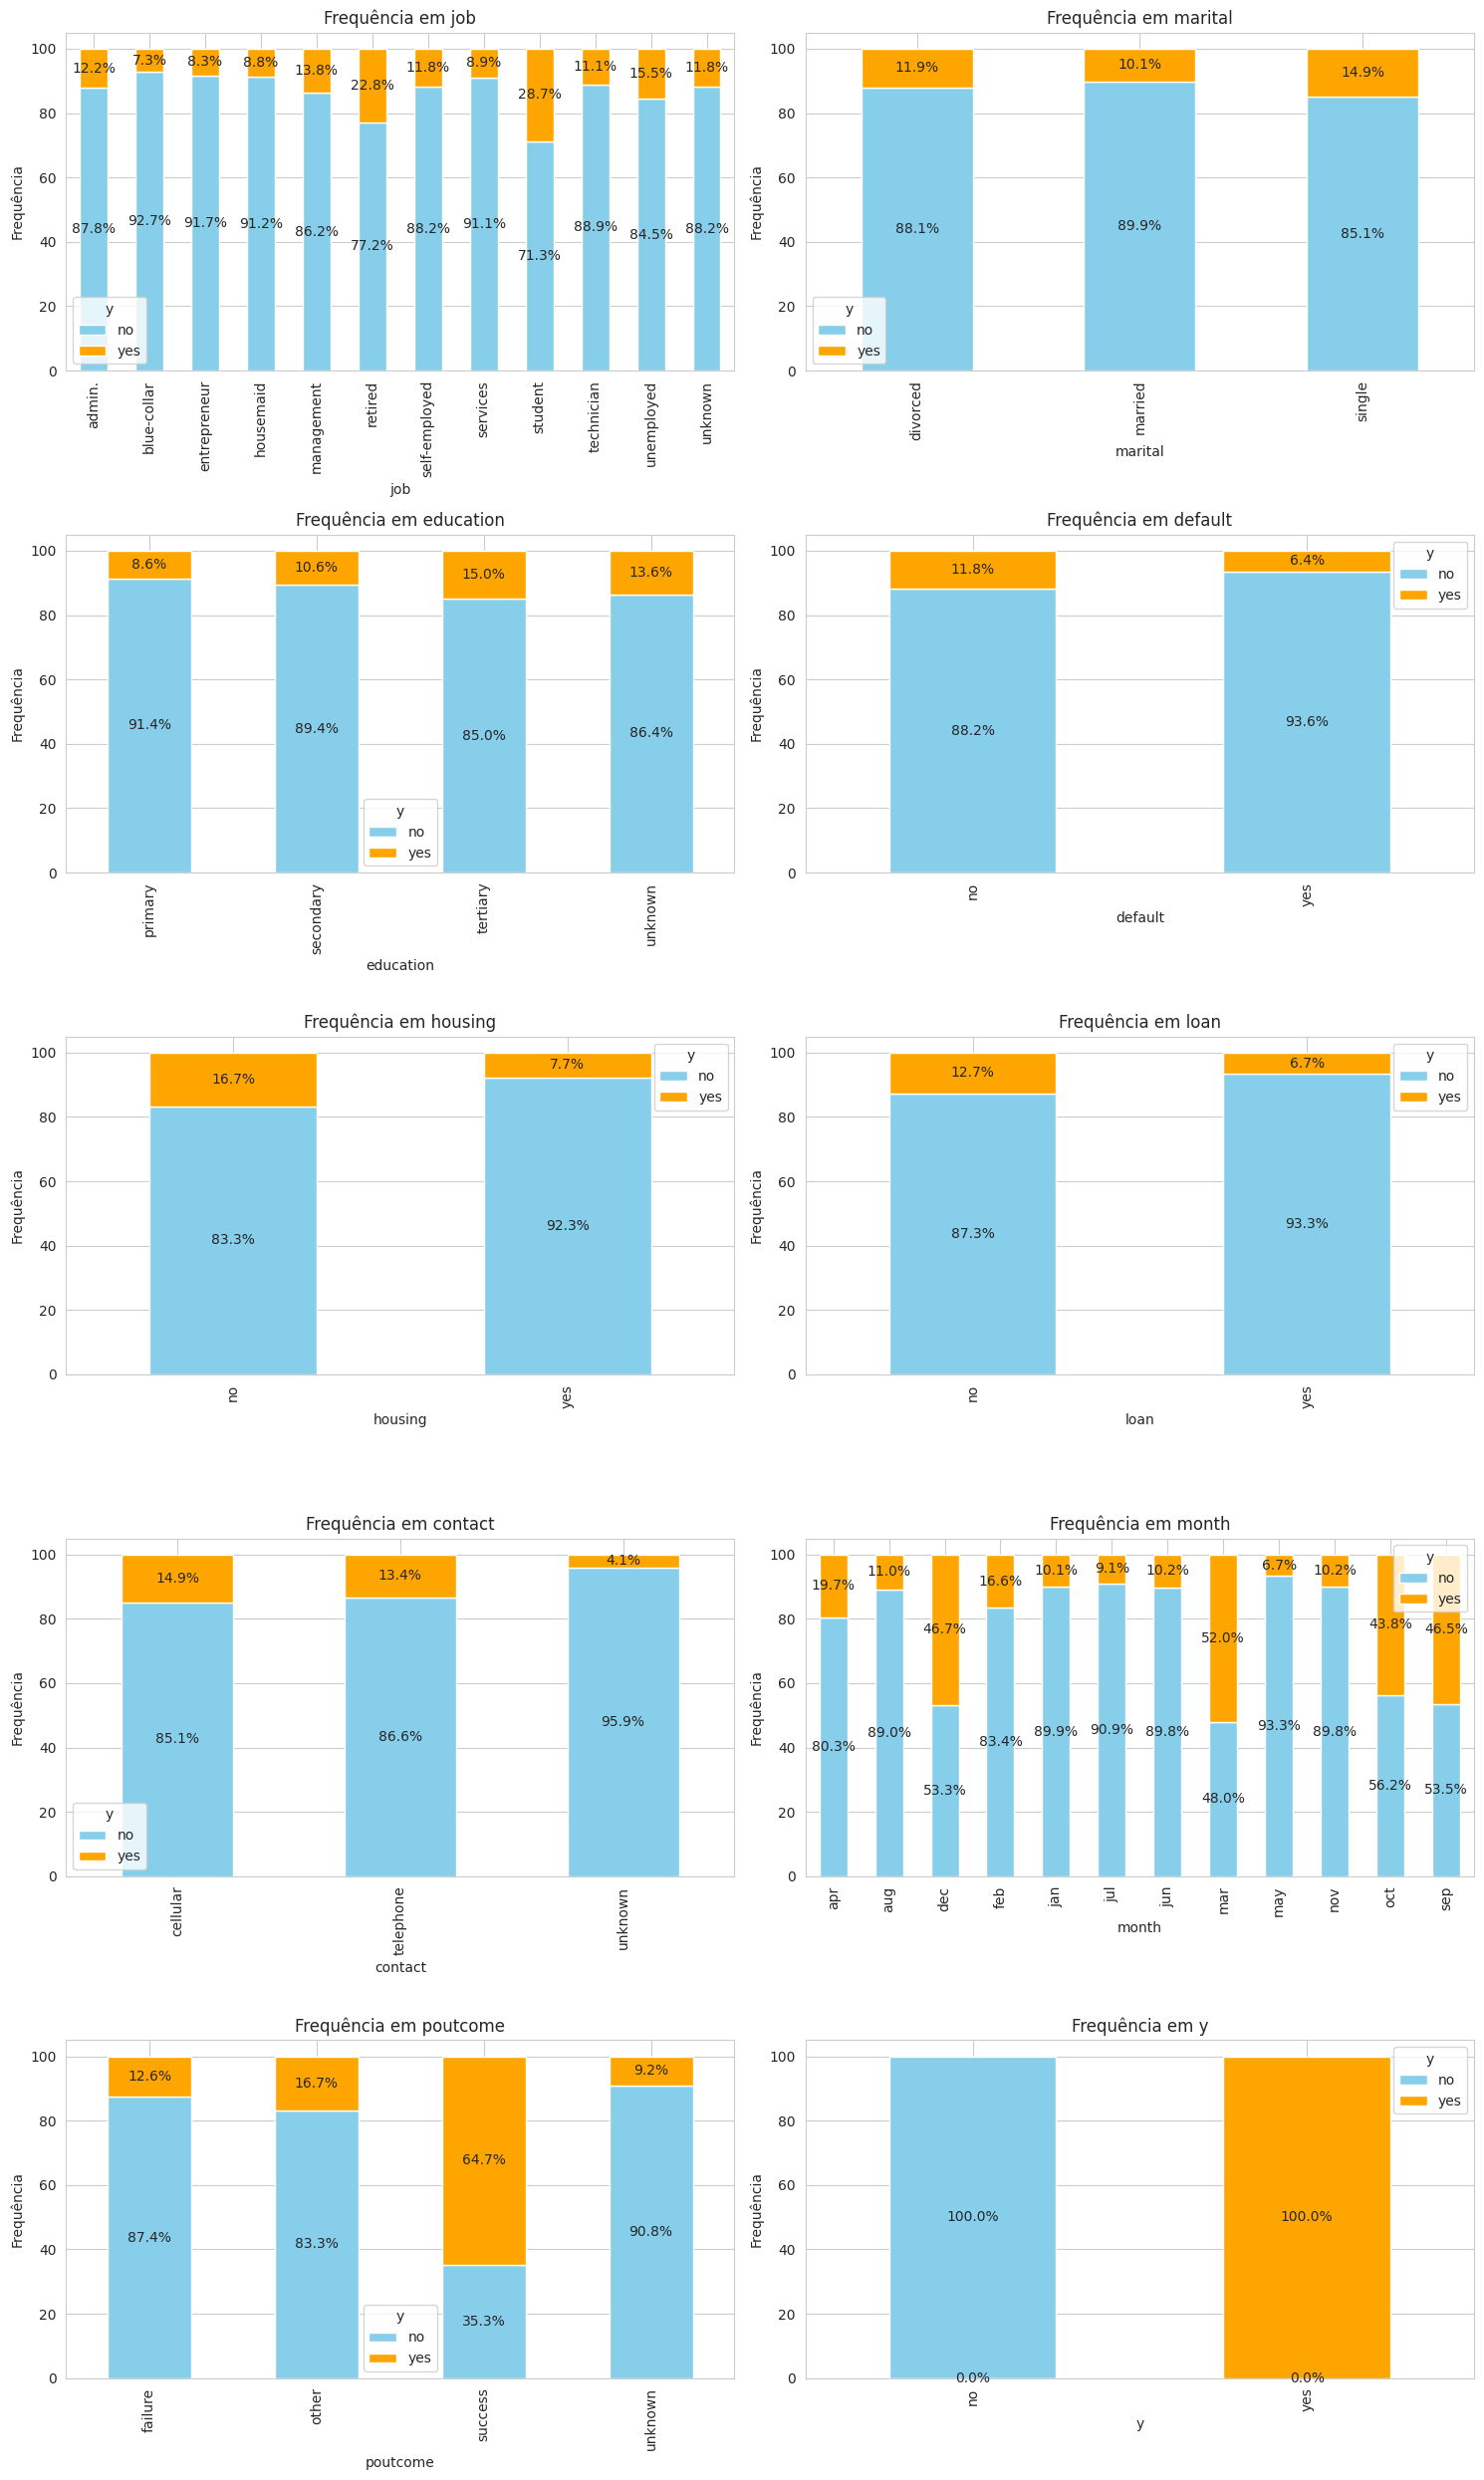

In [78]:
# Plota os gráficos com valores em percentagem
plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2, target='y', type='perc')

Esta análise, combinada com a anterior, permite observar quando a proporção do Target é diferente para cada categoria na coluna. Observa-se o seguinte:

* **job**: embora pouco frequentes, *retired* e *student* apresentam proporções maiores do que as outras categorias para **y == yes**. Também constatamos que a categoria *unknown* tem sim casos em que **y == yes**.

* **marital**: a categoria *single* apresenta uma maior propensão em faser o investimento (**y == yes** de 14.9% relativo a 11.9% para 'divorced' e 10.1% para 'married').

* **education**: *tertiary* tem uma propensão maior a contratar o investimento do que as outras categorias.

* **default**: maior chance de contratar o investimento se o cliente não for inadimplente. No entanto, lembrar que inadimplentes forma apenas 1.8% da base estudada.

* **housing**: quem tem empréstimo para habitação tem menor chance de contratar o serviço.

* **loan**: quem tem empréstimo pessoal tem menor chance de contratar o serviço.

* **contact**: *unknown* tem baixa probabilidade de contratar o serviço.

* **month**: meses com poucas chamadas (*mar*, *sep*, *out* e *dec*) tiveram muito mais conversões do que os meses com mais chamadas. **Vale a pena investigar**

* **poutcome**: embora infrequentes (3.34% da base), os casos de successo tiveram 4 vezes mais acquisições do produto comparado aos outros resultados.